_Autor: Christian Camilo Urcuqui López_

# Numpy paquete para tareas númericas en vectores y matrices

__Contenido__

+ [Numpy](#Numpy)
    + [El arreglo Numpy ndarray](#El-arreglo-Numpy-ndarray)
        + [Creando ndarrays](#Creando-ndarrays)
        + [dtype y shape](#dtype-y-shape)
        + [Tipos de datos NumPy](#Tipos-de-datos-NumPy)
        + [Aritmetica con NumPy](#Aritmetica-con-NumPy)
        + [Indexación y Slicing](#Indexación-y-Slicing)
+ [Ejercicios prácticos](#Ejercicios-prácticos)

<img src="../../../Utilities/NumPy_logo.png" width="500">


Es una herramienta útil para tareas numéricas, proporciona los mecanismos de almacenamiento y operaciones de datos a medida que las matrices crecen en tamaño. Es uno de los paquetes informáticos más importantes de Python (muchos paquetes científicos lo utilizan).

Numpy tiene algunas herramientas útiles, algunas de ellas lo son:

+ ndarray, es una eficiente matriz multidimensional que proporciona operaciones aritméticas rápidas 
+ Funciones matemáticas para operaciones rápidas en conjuntos completos de datos sin tener que escribir bucles
+ Herramientas para leer/escribir los datos de la matriz en el disco y trabajar con archivos mapeados en memoria.
+ Álgebra lineal, generación de números aleatorios y entre otras funciones.
+ A C API para conectar NumPy con bibliotecas escritas en C, C++ o FORTRAN.


El sitio web de NumPy es https://docs.scipy.org/doc/numpy/user/index.html

NumPy es tan importante para los cálculos numéricos en Python porque está diseñado para ser eficiente en grandes conjuntos de datos. Hay varias razones para ello:
+ NumPy almacena internamente los datos en un bloque de memoria contiguo, independiente de otros objetos Python. La biblioteca de algoritmos de NumPy esta escrita en el lenguaje C y puede operar en memoria sin ningún tipo de comprobación u otra sobrecarga. 
+ Las operaciones NumPy realizan cálculos complejos en arreglos sin necesidad de bucles.

**Con las matrices NumPy, sólo puede almacenar datos del mismo tipo, por ejemplo, todos los elementos deben ser de tipo float, enteros o cadenas**. A pesar de esta limitación, ndarrays gana sin duda alguna en lo que se trata de tiempos de operación.

### Importando numpy

Es común que algunos desarrolladores por estándar usen el seudónimo _np_ al momento de importar el paquete Numpy.

In [1]:
import numpy as np
np.__version__

'1.16.2'

Veamos la diferencia de poder computacional de un arreglo en numpy contra una lista en Python.

In [3]:
my_arr = np.arange(1000000)

my_list = list(range(1000000))

In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 119 ms


In [5]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 959 ms


Un aspecto a tener en cuenta cuando trabajamos con operaciones de Numpy y matrices es la forma del ndarray.

A diferencia de los objetos ndarray, los objetos de matriz solo pueden ser bidimensionales.

In [6]:
arr = np.zeros((3,3,3))
arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [7]:
# matrix solo recibe array de 2-D
np.matrix(arr)

ValueError: shape too large to be a matrix.

Este problema es posible de solucionar a través del paquete **Pandas** de Python.

## El arreglo Numpy ndarray

### Creando ndarrays

La función array es una de las formas de crear un array tipo NumPy.

In [11]:
alist = [1, 2, 3]
print(type(alist))
# puede recibir una lista con un conjunto de objetos del mismo tipo
arr = np.array(alist)
print(type(arr))
# con la función dtype podemos ver los tipos de los valores dentro del ndarray
print(arr.dtype)
arr

<class 'list'>
<class 'numpy.ndarray'>
int32


array([1, 2, 3])

**Observación:** Los datos de la lista deben ser del mismo tipo 

In [12]:
?np.dtype

In [13]:
data1 = [6, 7.5, 8, 0, 1]

arr1 = np.array(data1)

print(arr1.dtype)

print(arr1)

arr1 = np.array(["1", 3.5, 5])

print(arr1.dtype)

print(arr1)

float64
[6.  7.5 8.  0.  1. ]
<U3
['1' '3.5' '5']


**Observación:** En el anterior ejemplo podemos notar como los valores que eran numéricos fueron transformados a caracteres y cómo prevalece el float frente al int.

Algunos funciones que serán de utilidad:
```
+ zeros(): Return a new array of given shape and type, filled with zeros.
+ ones(): Return a new array of given shape and type, filled with ones.
+ arange(): Return evenly spaced values within a given interval.
+ linspace(): Return evenly spaced numbers over a specified interval.
+ random.randn: Return a sample (or samples) from the "standard normal" distribution.
```

In [20]:
# Creando un array de zeros con cinco elementos
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [29]:
# creando un array de 0 hasta 99
print(np.arange(100))
# creando un array de 10 hasta 79
print(np.arange(10,80))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]


In [111]:
# creando un array númerico de 10 hasta 1000 con saltos de 10
a= np.linspace(0, 100, 10)
print(a)
print(len(a))
# a = np.linspace(0, 101, 9, dtype=np.int64)
# print(a)
#a = np.linspace(0, 100, 10, endpoint=False)
#print(a)
#print(len(a))
del a

[  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]
10


**Observación**: Por defecto los intervalos de linspace son incluyentes pero se puede cambiar con el parámetro endpoint a False con el fin de no incluir el último extremo.

Ahora podemos utilizar NumPy para crear ndarray datos con distintas dimensiones

In [117]:
# un objeto ndarray de 5x5
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [124]:
# un objeto (cubo) ndarray de 5x5x5 de 1
np.zeros((5, 5, 5)) + 1
#np.zeros((5, 5, 5), dtype=np.int64) + 1

# astype nos permite cambiar de un tipo de variable a otra
#np.zeros((5, 5, 5)).astype(int) + 1
#np.ones((5, 5, 5))

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

En muchas ocasiones será necesario utilizar array numéricos generados aleatoriamente, veamos algunas alternativas que NumPy nos ofrece

In [183]:
# creemos un array de 1x1000 utilizando randn
data = np.random.randn(1000)

In [184]:
print(len(data))
# slicing
print(data[:10])

1000
[-0.47158221  1.07626491  0.54254778  0.23009271  0.43844915  0.77850043
  0.84042901 -0.04858138 -0.97844186 -1.38638179]


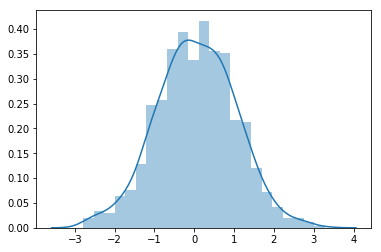

In [185]:
# ver la sección de visualizaciones donde se tratan matplotlib y seaborn
import seaborn as sns
sns.distplot(data)

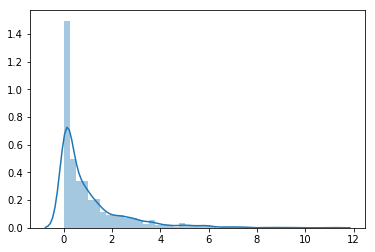

In [189]:
sns.distplot(np.random.chisquare(1,1000))

### dtype y shape

In [190]:
# una ndarray de 2x3
data = np.random.randn(2, 3)
data.shape

(2, 3)

In [191]:
# el ipo de los datos del ndarray
data.dtype

dtype('float64')

In [194]:
# ndarray de 2x4
data2 = [[1,2,3,4],[5,6,7,8]]

arr2 = np.array(data2)
print("tipo del ndarray: %s" %arr2.dtype)
print("shape: " + str(arr2.shape))
print("dimension: {} ".format(str(arr2.ndim)))

tipo del ndarray: int32
shape: (2, 4)
dimension: 2
